In [35]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# df = pd.read_pickle('data/df_encoded.pkl')
df = pd.read_pickle('data/df_ground_truth.pkl')
df.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,
2004-10-03 18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [36]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [37]:
#Check to see if there are msising data
df.isnull().values.any()

False

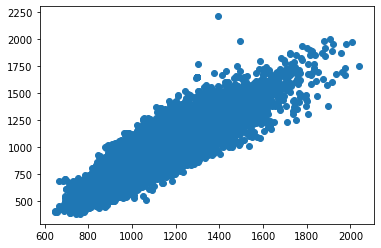

In [38]:
plt.scatter(df['PT08.S1(CO)'], df['PT08.S2(NMHC)'])

In [39]:
y = df[['PT08.S1(CO)']]
X = df[['PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [41]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)

print(sum(scores)/len(scores)*100,"%")

86.49968783801427 %


In [42]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.00,0.90,-0.78,0.68,0.90,0.04,0.12,0.12
PT08.S2(NMHC),0.90,1.00,-0.80,0.77,0.88,0.23,-0.08,0.17
PT08.S3(NOx),-0.78,-0.80,1.00,-0.54,-0.80,-0.13,-0.06,-0.22
PT08.S4(NO2),0.68,0.77,-0.54,1.00,0.58,0.56,-0.02,0.63
PT08.S5(O3),0.90,0.88,-0.80,0.58,1.00,-0.04,0.14,0.06
T,0.04,0.23,-0.13,0.56,-0.04,1.00,-0.57,0.65
RH,0.12,-0.08,-0.06,-0.02,0.14,-0.57,1.00,0.18
AH,0.12,0.17,-0.22,0.63,0.06,0.65,0.18,1.00


In [43]:
# Generated time lagged values to estimate the prediction of the current CO level give past levels
shifted_target = []
for each in range(5):
    shifted_target.append(df[['PT08.S1(CO)']].shift(periods=each+1, fill_value=np.nan).add_suffix(f"_shift_{each+1}"))

In [44]:
for each in shifted_target:
    df = df.join(each)

In [45]:
df.dropna(axis=0,inplace=True)

In [46]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,PT08.S1(CO)_shift_1,PT08.S1(CO)_shift_2,PT08.S1(CO)_shift_3,PT08.S1(CO)_shift_4,PT08.S1(CO)_shift_5
PT08.S1(CO),1.00,0.90,-0.78,0.68,0.90,0.04,0.12,0.12,0.89,0.73,0.58,0.47,0.39
PT08.S2(NMHC),0.90,1.00,-0.80,0.77,0.88,0.23,-0.08,0.17,0.79,0.61,0.46,0.34,0.26
PT08.S3(NOx),-0.78,-0.80,1.00,-0.54,-0.80,-0.13,-0.06,-0.22,-0.71,-0.58,-0.46,-0.37,-0.29
PT08.S4(NO2),0.68,0.77,-0.54,1.00,0.58,0.56,-0.02,0.63,0.58,0.44,0.33,0.24,0.19
PT08.S5(O3),0.90,0.88,-0.80,0.58,1.00,-0.04,0.14,0.06,0.83,0.69,0.55,0.43,0.35
T,0.04,0.23,-0.13,0.56,-0.04,1.00,-0.57,0.65,0.05,0.06,0.06,0.04,0.01
RH,0.12,-0.08,-0.06,-0.02,0.14,-0.57,1.00,0.18,0.10,0.09,0.10,0.13,0.18
AH,0.12,0.17,-0.22,0.63,0.06,0.65,0.18,1.00,0.13,0.13,0.12,0.12,0.11
PT08.S1(CO)_shift_1,0.89,0.79,-0.71,0.58,0.83,0.05,0.10,0.13,1.00,0.89,0.73,0.58,0.47
PT08.S1(CO)_shift_2,0.73,0.61,-0.58,0.44,0.69,0.06,0.09,0.13,0.89,1.00,0.89,0.73,0.58


In [47]:
y = df[['PT08.S1(CO)']]
X = df.drop(['PT08.S1(CO)'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_test['Predicted PT08.S1(CO)'] = y_pred.reshape(1,-1)[0]

<ipython-input-50-18164e322919>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted PT08.S1(CO)'] = y_pred.reshape(1,-1)[0]


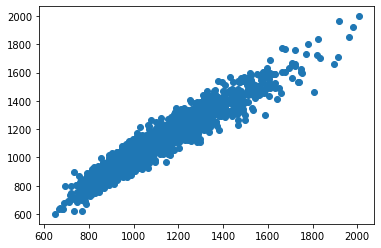

In [51]:
plt.scatter(y_test['PT08.S1(CO)'],y_test['Predicted PT08.S1(CO)'])

In [52]:
print("The Prediction R\u00b2 score is {}".format(round(model.score(X_train,y_train),3)))

The Prediction R² score is 0.922
